In [1]:
import numpy as np
import scipy.stats

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

# Лабораторна робота №4

## Регресійний аналіз. Виділення тренду.

In [3]:
rv = scipy.stats.uniform()

In [4]:
n = 1000
N = 51
NG = 20

x = np.arange(n) + (rv.rvs(size=n) * N) / NG
y = N * rv.rvs(size=n) * x + NG * rv.rvs(size=n) + N

In [5]:
# знаходження коефіцієнтів методом найменших квадратів
z = np.polyfit(x, y, deg=1)

In [6]:
# формування лінійної фукнції та власне апроксимації
f = np.poly1d(z)
y_ = f(x)

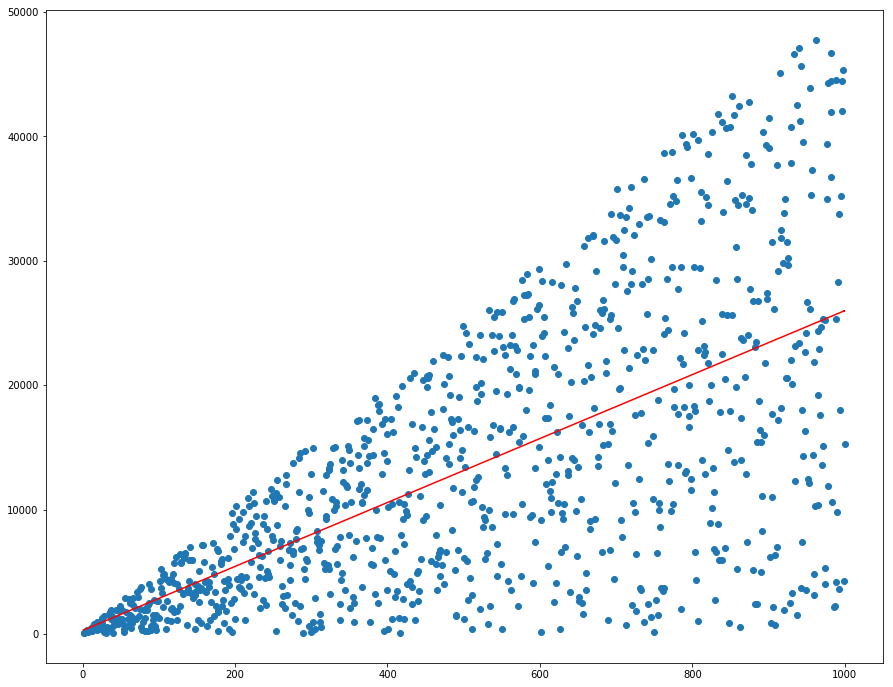

In [7]:
plt.figure(figsize=(15, 12))
plt.scatter(x, y)
plt.plot(x, y_, color="r")
plt.show()

In [8]:
e = y - y_
S = np.sum(e ** 2, axis=0) / (n - 2) * (1 - 1/n - (x - np.mean(x)) ** 2 / np.sum((x - np.mean(x))**2)) 

In [9]:
R = np.max(e / np.sqrt(S), axis=0)

In [10]:
Rd = 4

In [11]:
if R < Rd:
    print("Викиди відсутні")
else:
    print("Викиди присутні")

Викиди відсутні


In [12]:
b, a = z

### Перевірка моделі на адекватність

In [13]:
S2 = np.sum((y - y_)**2) / (n - 2)
S = np.sqrt(S2)

S2_x = np.sum(x - np.mean(x))**2 / (n-1)
S_x = np.sqrt(S2_x)

S2_y = np.sum(y - np.mean(y))**2 / (n-1)
S_y = np.sqrt(S2_y)

S2_beta = S / (S_x * np.sqrt(n - 1))
S_beta = np.sqrt(S2_beta)

S2_alpha = S * np.sqrt(1 / n + np.mean(x) ** 2 / ((n - 1) * S2_x))
S_alpha = np.sqrt(S2_alpha)

In [14]:
t_delta = 0.1257
F_delta = 1.25

In [15]:
np.abs(b) > t_delta * S_beta

False

In [16]:
np.abs(a) > t_delta * S_alpha

False

### Найкраща функціональна залежність

In [17]:
z1 = np.polyfit(x, y, deg=1)
f1 = np.poly1d(z1)
y_1 = f1(x)
S2_1 = np.sum((y - y_1)**2) / (n - 2)

z2 = np.polyfit(x, y, deg=2)
f2 = np.poly1d(z2)
y_2 = f2(x)
S2_2 = np.sum((y - y_2)**2) / (n - 2)

z3 = np.polyfit(x, y, deg=3)
f3 = np.poly1d(z3)
y_3 = f3(x)
S2_3 = np.sum((y - y_3)**2) / (n - 2)

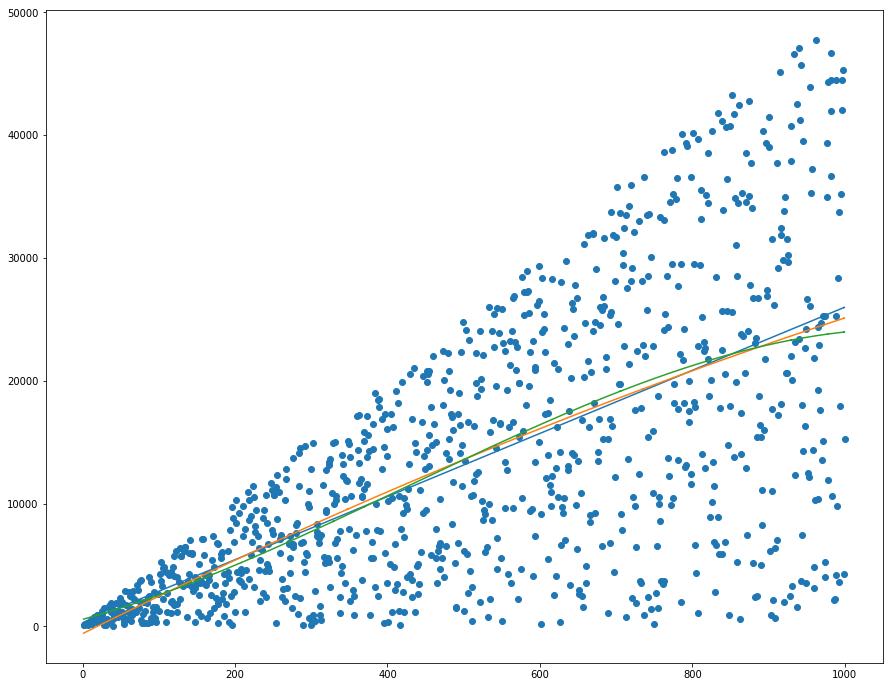

In [18]:
plt.figure(figsize=(15, 12))
plt.scatter(x, y)

plt.plot(x, y_1, label="1")
plt.plot(x, y_2, label="2")
plt.plot(x, y_3, label="3")

plt.show()

In [21]:
print(S2_1, S2_2, S2_3)

73447800.2775114 73292876.44464083 73102676.940348
